In [1]:
# importing the needed libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy .stats as stats
%matplotlib inline
sns.set()
import math
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.stats.multicomp as mc

In [2]:
# importing the data
Salary = pd.read_csv('C:\\Users\\91861\\Documents\\Statistics\\PCA\\Project\\SalaryData.csv')

In [3]:
# creating a copy of the original data
df =  Salary.copy()
df.head(2)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945


In [4]:
df.shape
print('No of rows:',df.shape[0])
print('No of columns:',df.shape[1])

No of rows: 40
No of columns: 3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [7]:
# checking the consitency of the data:
Mean = 162186.875
StD = 64860.407506
Coefficient_Variation =  round((StD / Mean) * 100,2)
print('The Coeffiecient of Variation explains the variability and the consistency of the data')
print('The CV% for the given data set is',Coefficient_Variation,'%')

The Coeffiecient of Variation explains the variability and the consistency of the data
The CV% for the given data set is 39.99 %


In [8]:
# checking for duplicates
duplicate = df.duplicated()

In [9]:
print('Number of duplicates in the data:', duplicate.sum())

Number of duplicates in the data: 0


In [10]:
# no anamolies
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [11]:
# no anamolies
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [12]:
# People who have doctorate earns more
Education = pd.DataFrame(df.groupby('Education')['Salary'].sum().sort_values(ascending=False))
Education

,Salary
Education,
Doctorate,3334832
Bachelors,2477294
HS-grad,675349


In [13]:
# people who are professionals earns more
pd.DataFrame(df.groupby('Occupation')['Salary'].sum().sort_values(ascending=False))

,Salary
Occupation,
Prof-specialty,2196391
Sales,1891253
Adm-clerical,1414243
Exec-managerial,985588


Text(0.5, 1.0, 'Boxplot showing the Salary break-up for different Education')

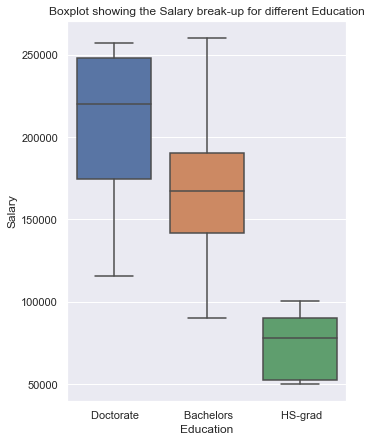

In [14]:
plt.figure(figsize=(5,7))
sns.boxplot(x='Education',y='Salary',data=df)
plt.title('Boxplot showing the Salary break-up for different Education')

Text(0.5, 1.0, 'Boxplot showing the Salary break-up for different Occupations')

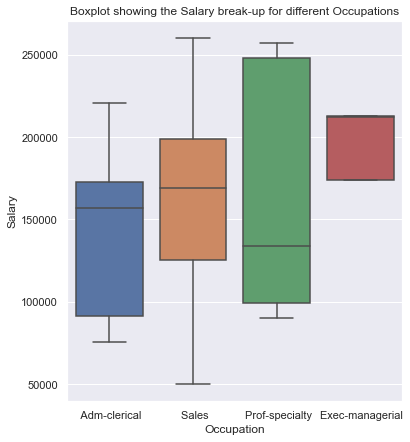

In [15]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Occupation',y='Salary',data=df)
plt.title('Boxplot showing the Salary break-up for different Occupations')

**One-Way ANOVA:**

1. One Factor and different levels
2. One Independent variable

**Assumptions for ANOVA**

1. All populations under consideration have normal distribution
2. All populations under consideration have equal variances.
3. The sample is a random sample, i.e. the observations are collected independently of each other 

**1.1 .State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.**


**Hypothesis for One-Way ANOVA on Salary with respect to Education:**
- $H_0$: 𝜇1 = 𝜇2 = 𝜇3
- $H_1$: Atleast for one Education level the salary is different from the rest


**Hypothesis for One-Way ANOVA on Salary with respect to Occupation:**
- $H_0$: 𝜇1 = 𝜇2 = 𝜇3 = 𝜇4
- $H_1$: Atleast for one Occupation type the salary is different from the rest

**1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

**One-Way ANOVA on Salary with respect to Education:**

- $H_0$: 𝜇1 = 𝜇2 = 𝜇3
- $H_1$: Atleast for one Education level the salary is different from the rest

In [16]:
# the mean salaries for all the three different educations are different.
df.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

In [17]:
# Checking through Anova:
model = ols('Salary ~ Education',df).fit()
aov_table1 = anova_lm(model)
print('ANOVA table on Salary with respect to Education')
print('------------------------------------------------------------------')
print(aov_table1)

ANOVA table on Salary with respect to Education
------------------------------------------------------------------
             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [18]:
# interpretations:
pvalue_Edu = aov_table1['PR(>F)'][0]
alpha = 0.05

In [19]:
if pvalue_Edu < alpha:
    print("  ")
    print('We reject the Null hypothesis as pvalue is significantly less than the alpha value')
    print("  ")
    print('We conclude that the Salary for atleast one of the Education level is different')
else:
    print('We do not reject the Null hypothesis as pvalue is significantly more than alpha value')
    print('We conclude that the Salary for all the Education level is equal/same')

  
We reject the Null hypothesis as pvalue is significantly less than the alpha value
  
We conclude that the Salary for atleast one of the Education level is different


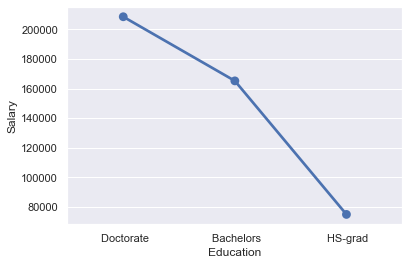

In [20]:
sns.pointplot(x='Education',y='Salary',data=df,ci=None)
plt.show()

**1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

**One-Way ANOVA on Salary with respect to Occupation:**

- $H_0$: 𝜇1 = 𝜇2 = 𝜇3 = 𝜇4
- $H_1$: Atleast for one Occupation type the salary is different from the rest

In [21]:
# the mean salaries for all the four different occupations are not significantly different.
# the salaries of different occupation are almost close to the mean salary.
df.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [22]:
# Checking through Anova:
model = ols('Salary ~ Occupation',df).fit()
aov_table2 = anova_lm(model)
print('ANOVA table on Salary with respect to Occupation')
print('------------------------------------------------------------------')
print(aov_table2)

ANOVA table on Salary with respect to Occupation
------------------------------------------------------------------
              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [23]:
# interpretations:
pvalue_Oc = aov_table2['PR(>F)'][0]
alpha = 0.05

In [24]:
if pvalue_Oc < alpha:
    print('We reject the Null hypothesis as pvalue is significantly less than the alpha value')
    print('We conclude that the Salary for atleast one of the Education level is different')
else:
    print(" ")
    print('We fail to reject the Null hypothesis as pvalue is significantly more than the alpha value')
    print(" ")
    print('We conclude that the Salary for all the Occupation type is not significantly different')

 
We fail to reject the Null hypothesis as pvalue is significantly more than the alpha value
 
We conclude that the Salary for all the Occupation type is not significantly different


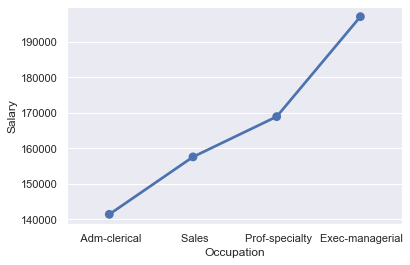

In [25]:
sns.pointplot(x='Occupation',y='Salary',data=df,ci=None)
plt.show()

**1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.**

The salary level with respect to Education is different whereas the salary level with respect to the occupations are equal.
- To find which class means of the Independent variable (Education) is significantly different, we use Tukey test (Multi comparison)

In [26]:
# library for tukey test (Multi comparison)
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

#### Tukey test(Multi comparison) for the Independent Variable Education:

In [55]:
# Posthoc test: Tukey test
MultiComp = MultiComparison(df['Salary'],df['Education'])
post_hoc_res = MultiComp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bachelors,Doctorate,43274.0667,0.0146,7541.1439,79006.9894,True
Bachelors,HS-grad,-90114.1556,0.001,-132035.1958,-48193.1153,True
Doctorate,HS-grad,-133388.2222,0.001,-174815.0876,-91961.3569,True


**Interpretations:**
1. p-value for all the groups are significantly lesser than the alpha.
2. For all the groups we reject the null hypothesis of equality of means.
3. The pairs Bachelors & HS-Grad and Doctorate & HS-Grad have very low p-value. Which means the common class among the two pairs HS-Grad is very far from the mean.
4. Hence, HS-Grad is the significantly different from the other two class.
5. The mean salary of HS-Grad is 75038 whereas the mean salary of the other two class is 165153 and 208427

In [63]:
# importing library for multicomp model
import statsmodels.stats.multicomp as mc

C:\Users\91861\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


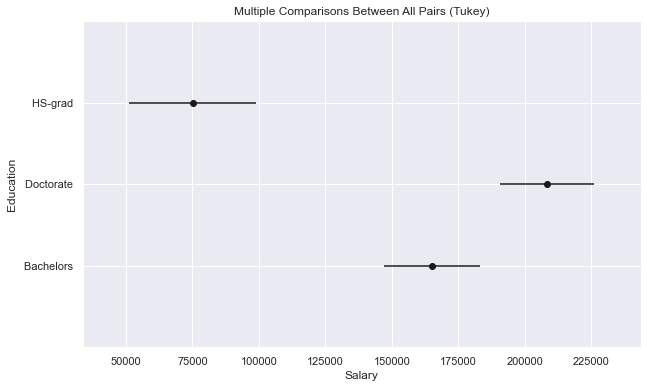

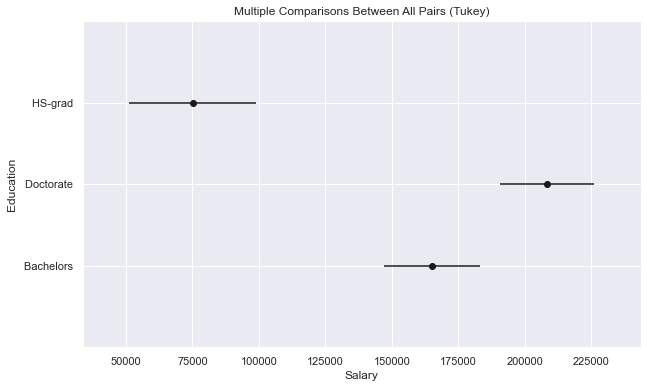

In [62]:
# plotting the Tukey test:
post_hoc_res.plot_simultaneous(ylabel= "Education", xlabel= "Salary")

#### Tukey test(Multi comparison) for the Independent Variable Occupation:

In [58]:
# Posthoc test: Tukey test
MultiComp1 = MultiComparison(df['Salary'],df['Occupation'])
post_hoc_res1 = MultiComp1.tukeyhsd()
post_hoc_res1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Adm-clerical,Exec-managerial,55693.3,0.4146,-40415.1459,151801.7459,False
Adm-clerical,Prof-specialty,27528.8538,0.7252,-46277.4011,101335.1088,False
Adm-clerical,Sales,16180.1167,0.9,-58951.3115,91311.5449,False
Exec-managerial,Prof-specialty,-28164.4462,0.8263,-120502.4542,64173.5618,False
Exec-managerial,Sales,-39513.1833,0.6507,-132913.8041,53887.4374,False
Prof-specialty,Sales,-11348.7372,0.9,-81592.6398,58895.1655,False


**Interpretations:**
1. The p-values for all the groups are higher than the alpha.
2. We fail to reject the null hypothesis of equality of means.
3. All the groups are almost near to the mean salary. 
4. The classes like Admin clerical and Exec managerial is slightly far from the mean when compared with other groups.

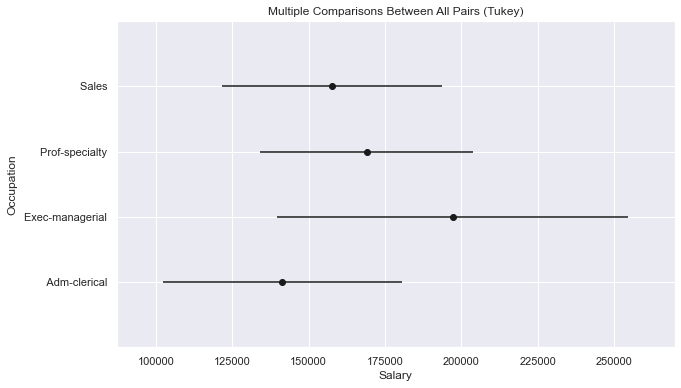

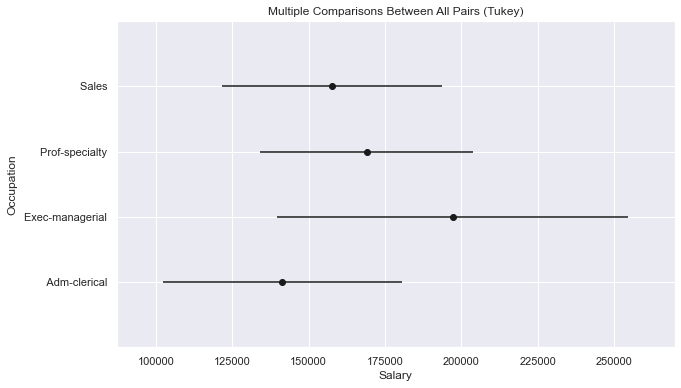

In [61]:
post_hoc_res1.plot_simultaneous(ylabel= "Occupation", xlabel= "Salary")

**1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.**

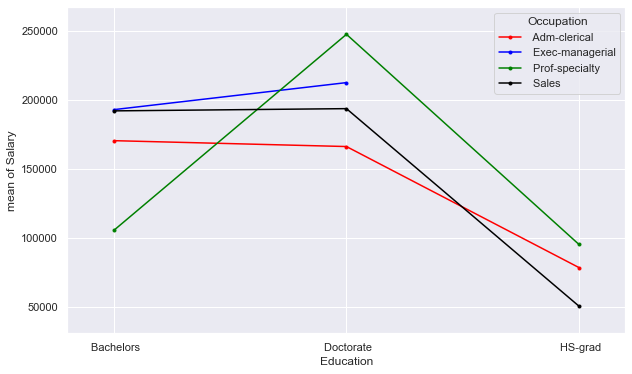

In [28]:
fig,ax= plt.subplots(figsize=(10,6))
fig = interaction_plot(x=df['Education'],trace=df['Occupation'],response=df['Salary'],colors=['red','blue','green','black'],
                      ylabel='Salary',xlabel='Education',ax=ax)
plt.show()

- From the interation plot, we can understand that there is significant interaction between Education and the Occupation with respect to salary.
- Below is the interaction anova table to prove the same.

- $H_0$: There is no interaction between Education and Occupation with respect to Salary
- $H_1$: There is a significant interaction between Education and Occupation with respect to Salary

In [29]:
model = ols('Salary ~ Education:Occupation',df).fit()
aov_table3 = anova_lm(model)
print('ANOVA Interaction table on Salary with respect to Education and Occupation')
print('-------------------------------------------------------------------------')
print(aov_table3)

ANOVA Interaction table on Salary with respect to Education and Occupation
-------------------------------------------------------------------------
                        df        sum_sq       mean_sq          F  \
Education:Occupation  11.0  1.438019e+11  1.307290e+10  18.384842   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education:Occupation  3.340466e-10  
Residual                       NaN  


In [30]:
pvalue_Int = aov_table3['PR(>F)'][0]
alpha = 0.05

In [31]:
if pvalue_Int < alpha:
    print('We reject the Null hypothesis as pvalue is significantly less than the alpha value')
    print(" ")
    print('There is a significant interaction between both the independent variables i.e., Education and Occupation')
else:
    print('We fail to reject the Null hypothesis as pvalue is not less than the alpha value')
    print('There is no significant interaction between both the independent variables i.e., Education and Occupation')

We reject the Null hypothesis as pvalue is significantly less than the alpha value
 
There is a significant interaction between both the independent variables i.e., Education and Occupation


**1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?**

**Two-Way ANOVA:**
1. Two factors with multiple levels
2. Two or more independent variables


In [32]:
# comparison of mean across different Education levels and Occupation types
Mean_Edu_Occ = pd.DataFrame(df.groupby(['Education','Occupation'])['Salary'].mean())
round(Mean_Edu_Occ,2)

Salary
Education  Occupation                 
 Bachelors  Adm-clerical     170711.00
            Exec-managerial  193201.75
            Prof-specialty   105787.75
            Sales            192300.75
 Doctorate  Adm-clerical     166457.75
            Exec-managerial  212781.00
            Prof-specialty   247772.83
            Sales            193916.60
 HS-grad    Adm-clerical      78759.67
            Prof-specialty    95534.33
            Sales             50822.33

<AxesSubplot:xlabel='Education', ylabel='Salary'>

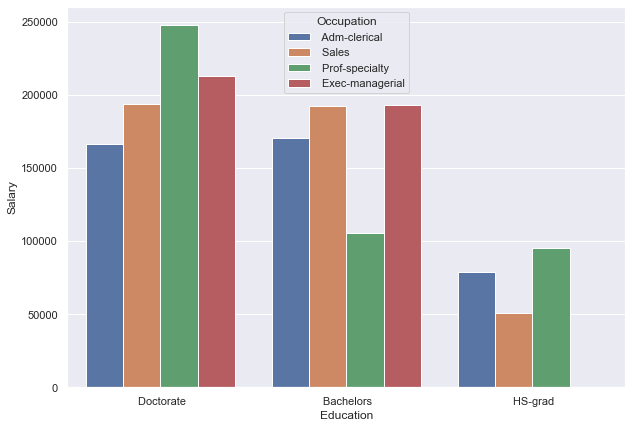

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x='Education',y='Salary',hue='Occupation',data=df,ci=None)

**Hypothesis for Two-Way ANOVA**

1. Factor: Education Effects
- $H_0$: 𝜇1 = 𝜇2 = 𝜇3
- $H_1$: Atleast for one Education level the salary is different from the rest
2. Factor: Occupation Effects
- $H_0$: 𝜇1 = 𝜇2 = 𝜇3 = 𝜇4
- $H_1$: Atleast for one Occupation type the salary is different from the rest
3. Interaction Effects
- $H_0$: There is no interaction between Education and Occupation with respect to Salary
- $H_1$: There is a significant interaction between Education and Occupation with respect to Salary

In [34]:
model = ols('Salary ~ Education + Occupation + Education:Occupation',df).fit()
aov_table4 = anova_lm(model)
print('Two-Way Anova Table')
print('-------------------------------------------------------------------------')
print(aov_table4)

Two-Way Anova Table
-------------------------------------------------------------------------
                        df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN  


In [35]:
# equality of means for the factor Education is rejected
aov_table4['PR(>F)'][0] < alpha

True

In [36]:
# # equality of means for the factor Occupation is not rejected
aov_table4['PR(>F)'][1] < alpha

False

In [37]:
# there is an interaction effect
aov_table4['PR(>F)'][2] < alpha

True

**Interpretations for Two-Way ANOVA Table:**
1. The pvalue for Education is significantly less than alpha. So, we reject the null hypothesis of equality of means. We conclude that there is a cause and effect relationship between Education and Salary.

2. The pvalue for Education is not less than alpha. So, we fail to reject the null hypothesis of equality of means. We conclude that there is no cause and effect relationship between Occupation and Salary.

3. The pvalue for the interaction effect is less than the alpha. So, the equality of means at each combination of Education and Occupation is also rejected

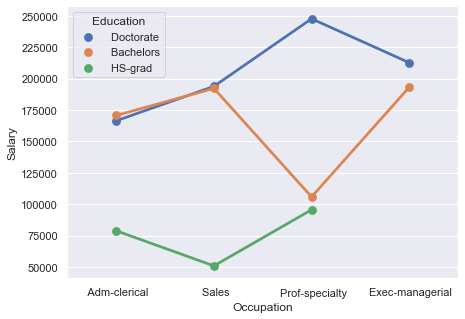

In [38]:
plt.figure(figsize=(7,5))
sns.pointplot(x='Occupation',y='Salary',hue='Education',data=df,ci=None)
plt.show()

**1.7 Explain the business implications of performing ANOVA for this particular case study.**

1. Education is the significant cause for the Salary to either increase or decrease.
2. There is no significant cause relationship between the occupation types and the Salary. 
3. On studying the interaction effect, though Occupation itself is not a significant cause but when it interacts with Education, it shows a cause effect relationship with Salary.
4. When Education along with Occupation is high, there is an increase in the Salary.